In [74]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import shap
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"
df = pd.read_csv(url)
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [2]:
df_clean = df.dropna()
df_clean = df_clean[df_clean['year'] >= 2000]
df_clean.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
3371,Bulgaria,2009,BGR,7487966.0,1.073651e+11,200.106,0.041,8.236,0.062,1.335,...,0.000,0.004,94.656,0.301,0.622,32.051,0.24,83.076,0.567,0.310
3372,Bulgaria,2010,BGR,7437542.0,1.090452e+11,199.971,0.123,24.874,0.185,5.378,...,0.022,0.018,187.487,1.152,1.774,91.428,0.68,238.573,1.481,0.847
3373,Bulgaria,2011,BGR,7379973.0,1.094354e+11,5.558,0.010,26.461,0.195,8.130,...,0.200,0.117,26.377,0.456,2.231,116.532,0.86,302.280,1.721,1.000
3374,Bulgaria,2012,BGR,7316974.0,1.102615e+11,399.988,0.781,133.441,0.976,9.567,...,1.679,0.948,41.784,0.916,3.147,166.736,1.22,430.047,2.626,1.486
3375,Bulgaria,2013,BGR,7264556.0,1.096435e+11,29.912,0.292,174.606,1.268,15.142,...,3.231,1.815,12.500,0.366,3.513,188.587,1.37,483.556,3.185,1.791


In [3]:
df_clean.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=130)

In [4]:
df_clean.shape

(124, 130)

In [5]:
X = df_clean[['gdp', 'population']]
y = df_clean['renewables_share_energy']

In [79]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (124, 2)
y shape: (124,)


In [80]:
X.isna().sum()

gdp           0
population    0
dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [8]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
])

C:\Users\flami\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=130)

In [109]:
X=df[['country', 'year', 'iso_code', 'population', 'gdp','biofuel_cons_change_pct', 'biofuel_cons_change_twh']].values
y=df ['wind_share_energy'].values

In [9]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
])

C:\Users\flami\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [11]:
history=model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - loss: 92.7904 - mae: 8.2100 - val_loss: 81.7842 - val_mae: 7.4465
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 89.9193 - mae: 8.1060 - val_loss: 80.1775 - val_mae: 7.3274
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 91.7305 - mae: 8.0846 - val_loss: 78.6010 - val_mae: 7.2084
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 88.9698 - mae: 7.9614 - val_loss: 77.0430 - val_mae: 7.0888
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 85.3377 - mae: 7.6720 - val_loss: 75.5109 - val_mae: 6.9679
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 87.2969 - mae: 7.8411 - val_loss: 73.9868 - val_mae: 6.8458
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 90.7815 - mae: 7.9751 - val_loss: 72.4344 - val_mae: 6.7180
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 88.2714 - mae: 7.7639 - val_loss: 70.9053 - val_mae: 6.5879
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 84.644

In [12]:
test_loss,test_mae=model.evaluate(X_test,y_test,verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 35.2665 - mae: 4.9616
Test Mean Absolute Error: 4.96


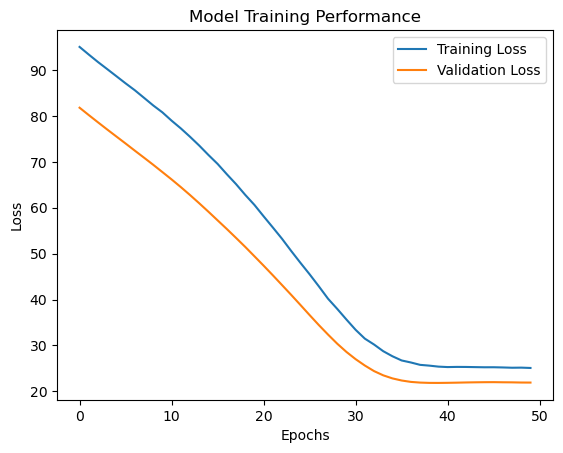

In [13]:
plt.plot(history.history ['loss'], label='Training Loss')
plt.plot(history.history ['val_loss'], label='Validation Loss')
plt.xlabel ('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()